# Demonstration of periodic plot axis

In [152]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd

proxy = SwarmRequest("https://staging.viresdisc.vires.services/openows")

start_time = dt.datetime(2017,1, 1)
end_time = dt.datetime(2017, 1, 2)

proxy.set_collection("SW_OPER_MAGA_LR_1B")
proxy.set_products(
    measurements=["F", "B_NEC"], models=[], auxiliaries=["MLT", "QDLat"]
)

data = proxy.get_between(start_time, end_time, asynchronous=False).as_xarray()
data

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (7.004MB)


<xarray.Dataset>
Dimensions:     (Timestamp: 86400, dim: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2017-01-01 ... 2017-01-01T23:59:59
Dimensions without coordinates: dim
Data variables:
    Spacecraft  (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 68.86 68.93 68.99 ... -34.98 -35.04 -35.1
    Longitude   (Timestamp) float64 137.4 137.4 137.4 ... -48.99 -48.99 -48.99
    Radius      (Timestamp) float64 6.812e+06 6.812e+06 ... 6.826e+06 6.826e+06
    F           (Timestamp) float64 4.827e+04 4.827e+04 ... 1.969e+04 1.97e+04
    B_NEC       (Timestamp, dim) float64 0.0 0.0 0.0 ... -3.252e+03 -1.396e+04
    MLT         (Timestamp) float64 8.602 8.602 8.602 ... 19.94 19.94 19.94
    QDLat       (Timestamp) float64 63.7 63.77 63.83 ... -27.76 -27.81 -27.86

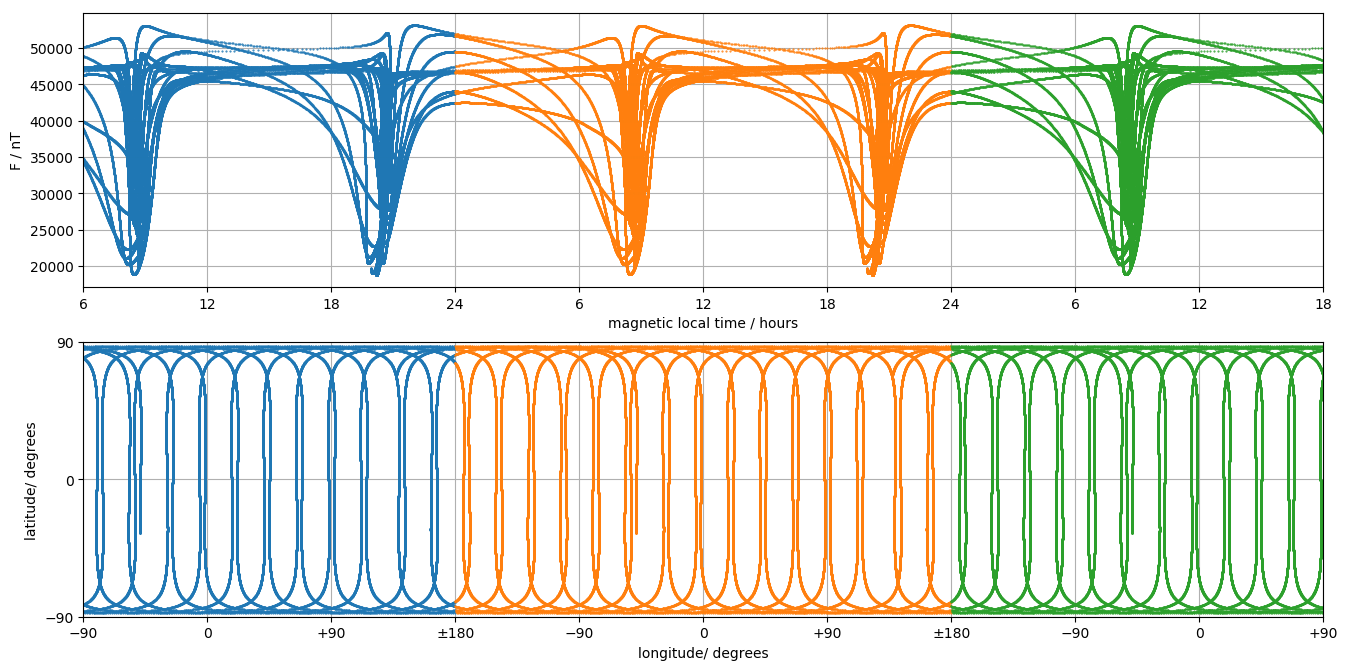

In [157]:
from matplotlib import pyplot as plt
from numpy import mod, arange, floor_divide, asarray, concatenate, empty, array
from itertools import chain

fig=plt.figure(figsize=(16, 8), dpi= 100, facecolor='w', edgecolor='k')

class PeriodicAxis(object):
    def __init__(self, period=1.0, offset=0):
        self.period = period
        self.offset = offset

    def _period_index(self, x):
        return floor_divide(x - self.offset, self.period)
    
    def periods(self, offset, size):
        return self.period * arange(self._period_index(offset), self._period_index(offset + size) + 1)
        
    def normalize(self, x):
        return mod(x - self.offset, self.period) + self.offset
        


def periodic_plot(pax, x, y, xmin, xmax, *args, **kwargs):
    xx = pax.normalize(x)
    for period in pax.periods(xmin, xmax - xmin):
        plt.plot(xx + period, y, *args, **kwargs)
    plt.xlim(xmin, xmax)
    
def periodic_xticks(pax, xmin, xmax, ticks, labels=None):
    ticks = asarray(ticks)
    labels = labels or ticks
    ticks_locations = concatenate([
        ticks + period
        for period in pax.periods(xmin, xmax - xmin)
    ])
    ticks_labels = list(chain.from_iterable(
        labels for _ in pax.periods(xmin, xmax - xmin)
    ))
    plt.xticks(ticks_locations, ticks_labels)
    plt.xlim(xmin, xmax)


plt.subplot(211)

pax_mlt = PeriodicAxis(24, 0)
xmin, xmax = -12-6, 36+6
periodic_plot(pax_mlt, data['MLT'], data['F'], xmin, xmax, '.', markersize=1)
periodic_xticks(pax_mlt, xmin, xmax, [0, 6, 12, 18], [24, 6, 12, 18])
plt.ylabel("F / nT")
plt.xlabel("magnetic local time / hours")
plt.grid()

plt.subplot(212)

pax_lon = PeriodicAxis(360, -180)
xmin, xmax = -360-90, 360+90
periodic_plot(pax_lon, data['Longitude'], data['Latitude'], xmin, xmax, '.', markersize=1)
periodic_xticks(pax_lon, xmin, xmax, [-90, 0, 90, 180], ["\u221290", 0, "+90", "\u00b1180"])
plt.yticks([-90, 0, 90])
plt.ylim(-90, 90)
plt.ylabel("latitude/ degrees")
plt.xlabel("longitude/ degrees")
plt.grid()




cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


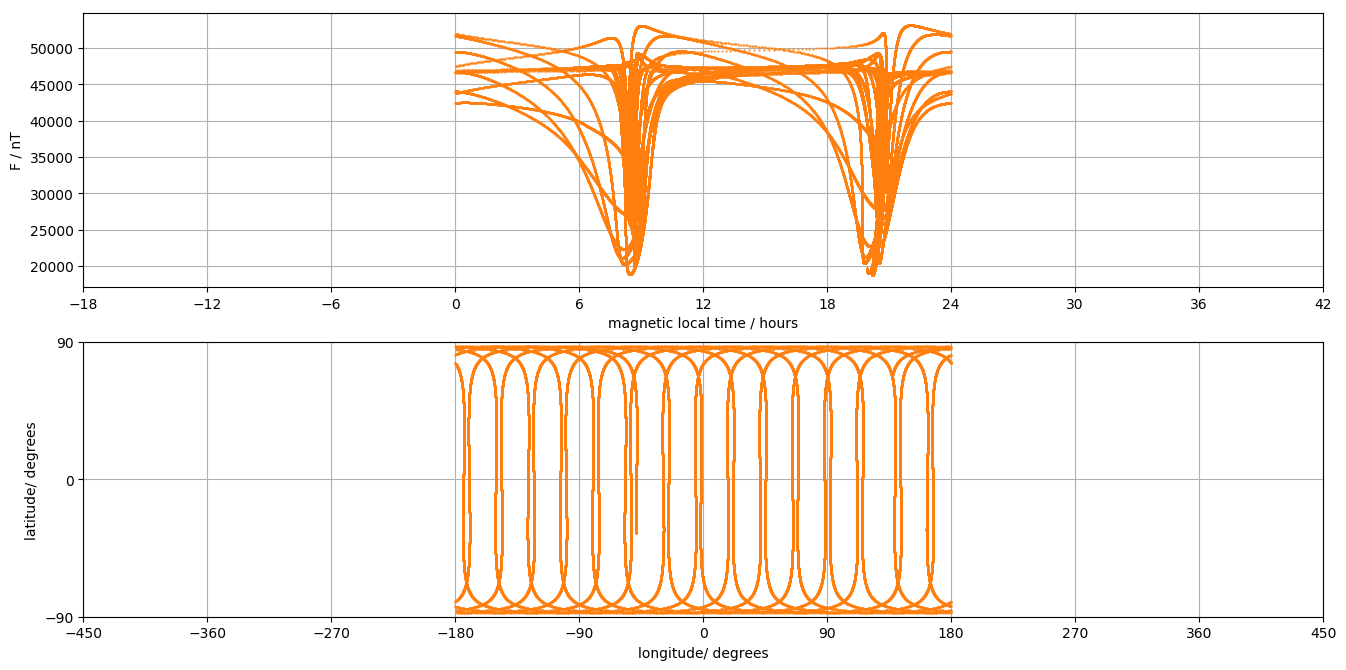

In [174]:
fig=plt.figure(figsize=(16, 8), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(211)

prop_cycle = plt.rcParams['axes.prop_cycle']
print(prop_cycle)
xmin, xmax = -12-6, 36+6
plt.plot(data['MLT'], data['F'], 'y.', color='#ff7f0e', markersize=1)
plt.xticks([-18, -12, -6, 0, 6, 12, 18, 24, 30, 36, 42])
plt.xlim(xmin, xmax)
plt.ylabel("F / nT")
plt.xlabel("magnetic local time / hours")
plt.grid()

plt.subplot(212)

xmin, xmax = -360-90, 360+90
plt.plot(data['Longitude'], data['Latitude'], 'y.', color='#ff7f0e', markersize=1)
plt.xticks(list(range(-450, 451, 90)))
plt.xlim(xmin, xmax)
plt.yticks([-90, 0, 90])
plt.ylim(-90, 90)
plt.ylabel("latitude/ degrees")
plt.xlabel("longitude/ degrees")
plt.grid()

In [145]:
plax = PeriodicLatitudeAxis()

start_time = dt.datetime(2017,1, 1)
end_time = dt.datetime(2017, 1, 15)

proxy.set_collection("SW_OPER_MAGA_LR_1B")
proxy.set_products(
    measurements=["F", "B_NEC"], models=[], auxiliaries=["MLT", "QDLat"]
)

data = proxy.get_between(start_time, end_time, asynchronous=True).as_xarray()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (97.987MB)


<xarray.Dataset>
Dimensions:     (Timestamp: 1209600, dim: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2017-01-01 ... 2017-01-14T23:59:59
Dimensions without coordinates: dim
Data variables:
    Spacecraft  (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 68.86 68.93 68.99 ... -46.12 -46.05 -45.99
    Longitude   (Timestamp) float64 137.4 137.4 137.4 ... 108.8 108.8 108.8
    Radius      (Timestamp) float64 6.812e+06 6.812e+06 ... 6.828e+06 6.828e+06
    F           (Timestamp) float64 4.827e+04 4.827e+04 ... 5.007e+04 5.006e+04
    B_NEC       (Timestamp, dim) float64 0.0 0.0 0.0 ... -3.854e+03 -4.89e+04
    MLT         (Timestamp) float64 8.602 8.602 8.602 ... 6.531 6.533 6.535
    QDLat       (Timestamp) float64 63.7 63.77 63.83 ... -59.25 -59.18 -59.11
(120960,)
(120960,)


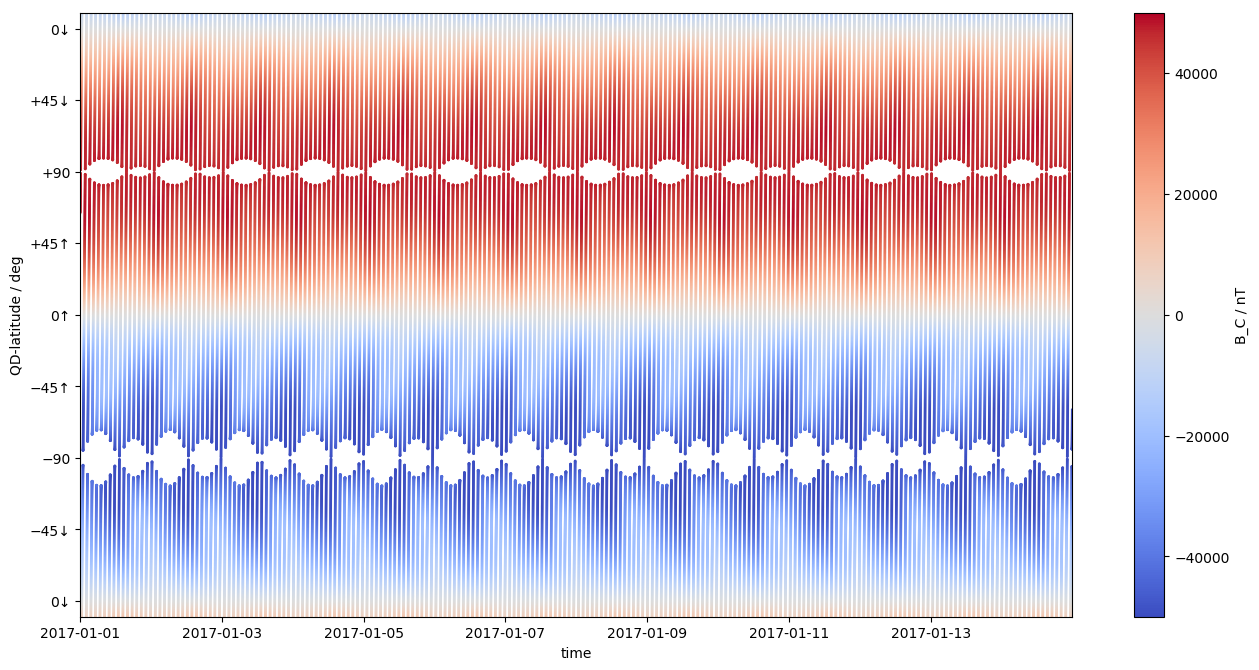

In [149]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase


class PeriodicLatitudeAxis(PeriodicAxis):
    def __init__(self, period=360, offset=-270):
        super().__init__(period, offset)
    
    def periods(self, offset, size):
        return self.period * arange(self._period_index(offset), self._period_index(offset + size) + 1)
        
    def normalize(self, x):
        return mod(x - self.offset, self.period) + self.offset

def periodic_latscatter(pax, x, y, ymin, ymax, *args, **kwargs):
    yy = pax.normalize(y)
    for period in pax.periods(xmin, xmax - xmin):
        plt.scatter(x, yy + period, *args, **kwargs)
    plt.ylim(ymin, ymax)

    
def periodic_yticks(pax, ymin, ymax, ticks, labels=None):
    ticks = asarray(ticks)
    labels = labels or ticks
    ticks_locations = concatenate([
        ticks + period
        for period in pax.periods(ymin, ymax - ymin)
    ])
    ticks_labels = list(chain.from_iterable(
        labels for _ in pax.periods(ymin, ymax - ymin)
    ))
    plt.yticks(ticks_locations, ticks_labels)
    plt.ylim(ymin, ymax)

fig=plt.figure(figsize=(16, 8), dpi= 100, facecolor='w', edgecolor='k')
print(data)
tmp1 = array(data['QDLat'][1:])
tmp0 = array(data['QDLat'][:-1])
pass_flag = tmp1 - tmp0
latitudes = tmp0
times = array(data['Timestamp'][:-1])
values = array(data['B_NEC'][:-1, 2])

pass_flag = pass_flag[::10]
latitudes = latitudes[::10]
times = times[::10]
values = values[::10]


plotted_latitudes = array(latitudes)
descending = pass_flag < 0
print(descending.shape)
print(plotted_latitudes.shape)
plotted_latitudes[descending] = -180 - latitudes[descending]

vmax = 5e4
periodic_latscatter(
    plax, times, plotted_latitudes, -190, 190, c=values, s=1, cmap=cm.coolwarm, norm=Normalize(vmin=-vmax,vmax=vmax)
)
cax = plt.colorbar()
cax.ax.set_ylabel("B_C / nT")

plt.xlim(times.min(), times.max())
plt.xlabel("time")
plt.ylabel("QD-latitude / deg")

periodic_yticks(plax, -190, +190, [-225, -180, -135, -90, -45,  0, 45,  90], labels=[
    '+45\u2193', '0\u2193', '\u221245\u2193', '\u221290', '\u221245\u2191', '0\u2191', '+45\u2191', '+90'
])

Text(0, 0.5, 'QD-latitude / deg')

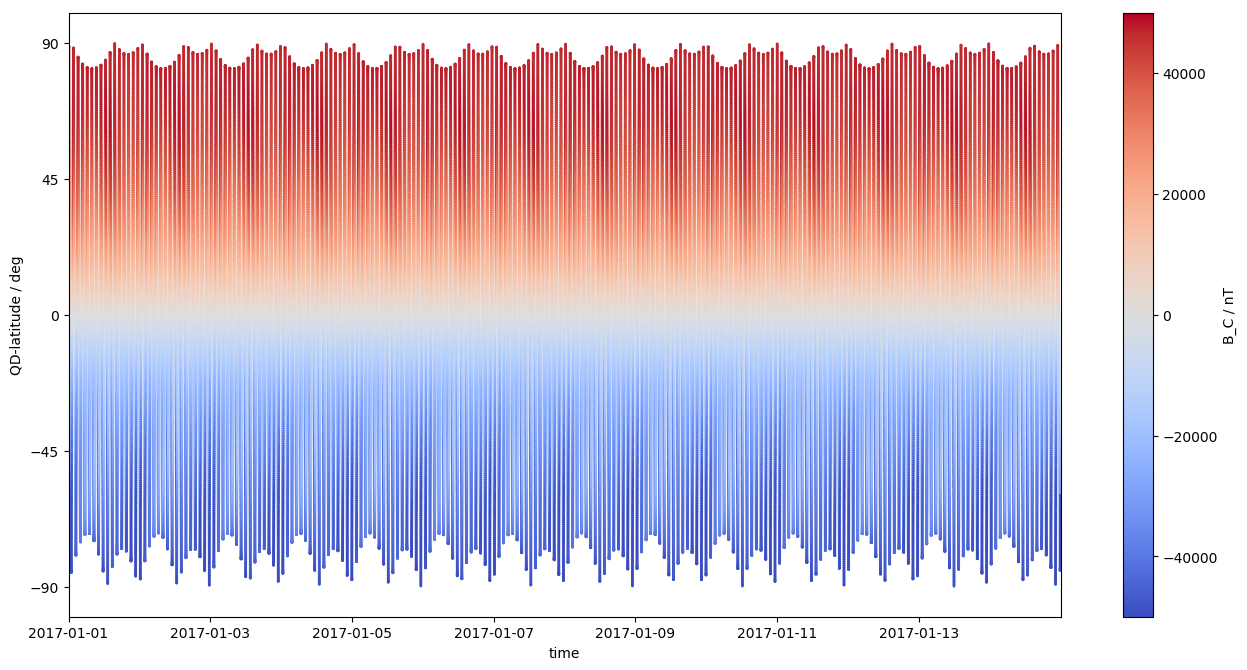

In [179]:
fig=plt.figure(figsize=(16, 8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(
     times, latitudes, c=values, s=1, cmap=cm.coolwarm, norm=Normalize(vmin=-vmax,vmax=vmax)
)
cax = plt.colorbar()
cax.ax.set_ylabel("B_C / nT")
plt.yticks(range(-90, 91, 45))
plt.ylim(-100, 100)
plt.xlim(times.min(), times.max())
plt.xlabel("time")
plt.ylabel("QD-latitude / deg")